<div style="border:solid Chocolate 2px; padding: 40px">

<b> Данила, привет!👋</b>

Меня зовут Алексей Гриб, и я буду ревьюером твоего проекта. 

Сразу хочу предложить в дальнейшем общаться на "ты" - надеюсь, так будет комфортнее:) Но если это неудобно, обязательно дай знать, и мы придумаем что-нибудь ещё!
    
Цель ревью - не искать ошибки в твоём проекте, а помочь тебе сделать твою работу ещё лучше, устранив недочёты и приблизив её к реальным задачам специалиста по работе с данными. Поэтому не расстраивайся, если что-то не получилось с первого раза - это нормально, и это поможет тебе вырасти!
    
Ты можешь найти мои комментарии, обозначенные <font color='green'>зеленым</font>, <font color='gold'>желтым</font> и <font color='red'>красным</font> цветами, например:

<br/>

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> похвала, рекомендации «со звёздочкой», полезные лайфхаки, которые сделают и без того красивое решение ещё более элегантным.
</div>

<br/>

<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации⚠️:</b> некритичные ошибки или развивающие рекомендации на будущее. 
</div>


<br/>
<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

    
<b>На доработку❌:</b>
Критичные ошибки, которые обязательно нужно исправить.
</div>

    
Пожалуйста, не удаляй мои комментарии, они будут особенно полезны для нашей работы в случае повторной проверки проекта. 
    
Ты также можешь задавать свои вопросы, реагировать на мои комментарии, делать пометки и пояснения - полная творческая свобода! Но маленькая просьба - пускай они будут отличаться от моих комментариев, это поможет избежать путаницы в нашем общении:)
Например, вот так:
    
<div class="alert alert-info">
<h2> Комментарий студента <a class="tocSkip"> </h2>

*твой текст*
</div>
    
Давай посмотрим на твой проект!

# Определение стоимости автомобилей

Сервис по продаже автомобилей с пробегом «Не бит, не крашен» разрабатывает приложение для привлечения новых клиентов. В нём можно быстро узнать рыночную стоимость своего автомобиля. В вашем распоряжении исторические данные: технические характеристики, комплектации и цены автомобилей. Вам нужно построить модель для определения стоимости. 

Заказчику важны:

- качество предсказания;
- скорость предсказания;
- время обучения.

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Хорошее вступление!
    
В нём есть всё, что необходимо, чтобы понять суть проекта с первых строк отчёта!

## Подготовка данных

In [1]:
import pandas as pd
import numpy as np
import lightgbm as lgb
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import re
import time
import os

from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.impute import SimpleImputer

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.dummy import DummyRegressor

warnings.filterwarnings("ignore")

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Библиотеки импортировали - отлично!

<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации⚠️:</b> 

Я вижу, исполнение твоего кода начинается в ячейке с номером, который отличается от единицы. Перед отправкой проекта стоит проверять работоспособность кода — это можно сделать, нажав на панели Jupiter Hub ``Kernel`` и ``Restart & Run All`` (см скриншот ниже).

![](https://i.postimg.cc/yd19rYf6/Screenshot-428.png)
        
Важно также убедиться, что все ячейки проекта исполнились - можно просто пролистать работу до конца и убедиться, что последняя ячейка исполнена. Такая проверка поможет тебе убедиться, что твоё решение будет должным образом воспроизведено во время ревью или во время передачи его заказчику - это очень важный этап, пренебрегать которым не стоит:)

In [2]:
path_1 = '/datasets/autos.csv'
path_2 = './datasets/autos.csv'

try: 
    df = pd.read_csv(path_1)
except:
    if os.path.exists(path_2):
        df = pd.read_csv(path_2)
    else:
        print('Dataset not found')

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍</b> 
    
Данные загрузили.
    
При считывании данных из файла здорово перестраховывать себя от ошибок, связанных, например, с неверным указанием пути к файлу. А иногда бывает, что работаешь с файлом локально, выгружаешь его на сервер, ожидая, что он будет принимать данные, которые лежат на том же сервере, а код падает с ошибкой, потому что путь к файлу не поменялся с локального на серверный.
    
Для этого, например, можно использовать конструкцию `try-except`: сначала пробуешь локальный путь, при возникновении ошибки используется серверный путь (подробнее можешь почитать тут: https://pythonworld.ru/tipy-dannyx-v-python/isklyucheniya-v-python-konstrukciya-try-except-dlya-obrabotki-isklyuchenij.html).
    
Но еще лучше использовать библиотеку `os` - её использование позволит тебе проверять существование указанных директорий (что может быть актуально при одновременной работа на локальном и сетевом окружении) и загружать данные из существующей директории, избегая ошибок. Как пример:
    
    import os

    pth1 = '/folder_1/data.csv'
    pth2 = '/folder_2/data.csv'
    
    if os.path.exists(pth1):
        query_1 = pd.read_csv(pth1)
    elif os.path.exists(pth2):
        query_1 = pd.read_csv(pth2)
    else:
        print('Something is wrong')

Ещё на этапе считывания данных можно спарсить дату: за это действие отвечает параметр `parse_dates` метода `read_csv()`, в него нужно передать список с названием полей-дат, и в большинстве случаев дата будет корректно преобразована в нужный формат сразу:)
Также на этапе считывания данных задать индекс-столбец- за это действие отвечает параметр `index_col`.

In [3]:
df.head(10)

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,Repaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
0,2016-03-24 11:52:17,480,NaN,1993,manual,0,golf,150000,0,petrol,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,18300,coupe,2011,manual,190,NaN,125000,5,gasoline,audi,yes,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21
5,2016-04-04 17:36:23,650,sedan,1995,manual,102,3er,150000,10,petrol,bmw,yes,2016-04-04 00:00:00,0,33775,2016-04-06 19:17:07
6,2016-04-01 20:48:51,2200,convertible,2004,manual,109,2_reihe,150000,8,petrol,peugeot,no,2016-04-01 00:00:00,0,67112,2016-04-05 18:18:39
7,2016-03-21 18:54:38,0,sedan,1980,manual,50,other,40000,7,petrol,volkswagen,no,2016-03-21 00:00:00,0,19348,2016-03-25 16:47:58
8,2016-04-04 23:42:13,14500,bus,2014,manual,125,c_max,30000,8,petrol,ford,NaN,2016-04-04 00:00:00,0,94505,2016-04-04 23:42:13
9,2016-03-17 10:53:50,999,small,1998,manual,101,golf,150000,0,NaN,volkswagen,NaN,2016-03-17 00:00:00,0,27472,2016-03-31 17:17:06


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   DateCrawled        354369 non-null  object
 1   Price              354369 non-null  int64 
 2   VehicleType        316879 non-null  object
 3   RegistrationYear   354369 non-null  int64 
 4   Gearbox            334536 non-null  object
 5   Power              354369 non-null  int64 
 6   Model              334664 non-null  object
 7   Kilometer          354369 non-null  int64 
 8   RegistrationMonth  354369 non-null  int64 
 9   FuelType           321474 non-null  object
 10  Brand              354369 non-null  object
 11  Repaired           283215 non-null  object
 12  DateCreated        354369 non-null  object
 13  NumberOfPictures   354369 non-null  int64 
 14  PostalCode         354369 non-null  int64 
 15  LastSeen           354369 non-null  object
dtypes: int64(7), object(

Датасет содержит в себе названия столбцов, которые стилистически не является `snake_case`. Исправим это с помощью регулярных выражений.

In [5]:
def camel_case_to_snake_case(string: str) -> str:
    result = re.sub(r'(?<!^)(?=[A-Z])', '_', string).lower()
    return result

In [6]:
renamed_columns = {col: camel_case_to_snake_case(col) for col in df.columns}
df = df.rename(columns=renamed_columns)
df.columns

Index(['date_crawled', 'price', 'vehicle_type', 'registration_year', 'gearbox',
       'power', 'model', 'kilometer', 'registration_month', 'fuel_type',
       'brand', 'repaired', 'date_created', 'number_of_pictures',
       'postal_code', 'last_seen'],
      dtype='object')

- `date_crawled` — дата скачивания анкеты из базы
- `vehicle_type` — тип автомобильного кузова
- `registration_year` — год регистрации автомобиля
- `gearbox` — тип коробки передач
- `power` — мощность (л. с.)
- `model` — модель автомобиля
- `kilometer` — пробег (км)
- `registration_month` — месяц регистрации автомобиля
- `fuel_type` — тип топлива
- `brand` — марка автомобиля
- `repaired` — была машина в ремонте или нет
- `date_created` — дата создания анкеты
- `number_of_pictures` — количество фотографий автомобиля
- `postal_code` — почтовый индекс владельца анкеты (пользователя)
- `last_seen` — дата последней активности пользователя

**Целевой признак**
- `price` — цена (евро)

Приведём столбцы `date_crawled`, `registration_year`, `last_seen` к типу даты.

In [7]:
df['date_crawled'] = pd.to_datetime(df['date_crawled'], format='%Y-%m-%d %H:%M:%S')
# df['registration_year'] = pd.to_datetime(df['registration_year'], format='%Y-%m-%d %H:%M:%S')
df['date_created'] = pd.to_datetime(df['date_created'], format='%Y-%m-%d %H:%M:%S')
df['last_seen'] = pd.to_datetime(df['last_seen'], format='%Y-%m-%d %H:%M:%S')

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍</b> 
    
Данные осмотрели, преобразовали столбцы и типы данных в датах - отлично!

### Поиск аномалий в столбцах

Проверим сначала целевой признак, то бишь, столбец `price`.

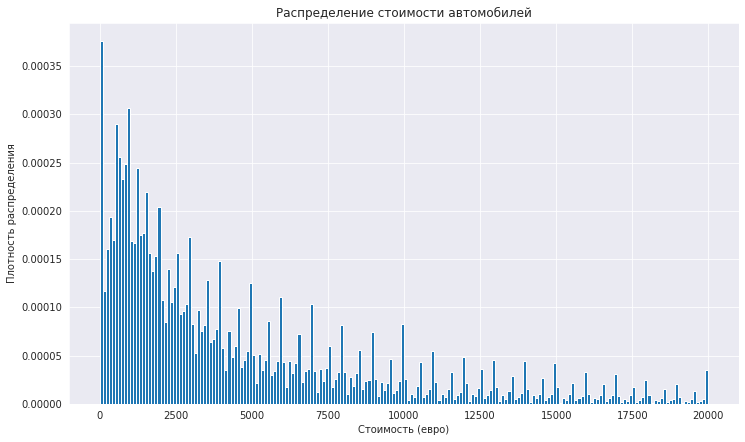

In [8]:
sns.set_style('darkgrid')
df['price'].hist(bins=200, figsize=(12, 7), density=True)
plt.title('Распределение стоимости автомобилей')
plt.xlabel('Стоимость (евро)')
plt.ylabel('Плотность распределения')
plt.show()

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

    
<b>На доработку❌:</b>
Используется ненормированная гистограмма - по оси Y в этом случае просто число наблюдений. Тут и далее.

<div class="alert alert-info">
<h2> Комментарий студента <a class="tocSkip"> </h2>

Сделал гистограммы нормироваными
</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера v.2 <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Учтено.

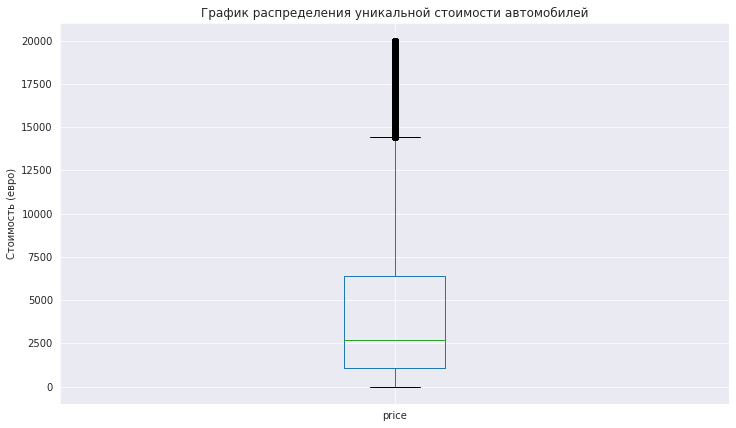

In [9]:
df.boxplot(['price'], figsize=(12, 7))
plt.title('График распределения уникальной стоимости автомобилей')
plt.ylabel('Стоимость (евро)')
plt.show()

In [10]:
df[df['price'] < 100]['price'].count()

13314

Исходя из гистограммы, мы видим, что стоимость автомобиля меньше, чем 100 евро являкется аномалией. Уберем аномальные значения.

In [11]:
df = df[df['price'] > 100]
df[df['price'] < 100]['price'].count()

0

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍</b> 
    
Удалены объявления с низкой ценой - отлично!

<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации⚠️:</b> 

Я также рекомендую удалить неадекватно низкие значения цен: в пределах цен до 1000-2000 вряд ли можно купить полноценный автомобиль.

Исходя из дат формирования списков, можно отсеять все объявления, который не подходят по нынешнии реалии. Возьмем цифру в примерно 70 лет давности и более.

In [12]:
df = df[(df['registration_year'] >= 1950) & (df['registration_year'] < 2017)]

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍</b> 
    
По году регистрации фильтрация корректна.

Теперь посмотрим на столбец `power`. Судя по предварительному просмотру, данный столбец имеет необъяснимо большие данные по мощности автомобилей.

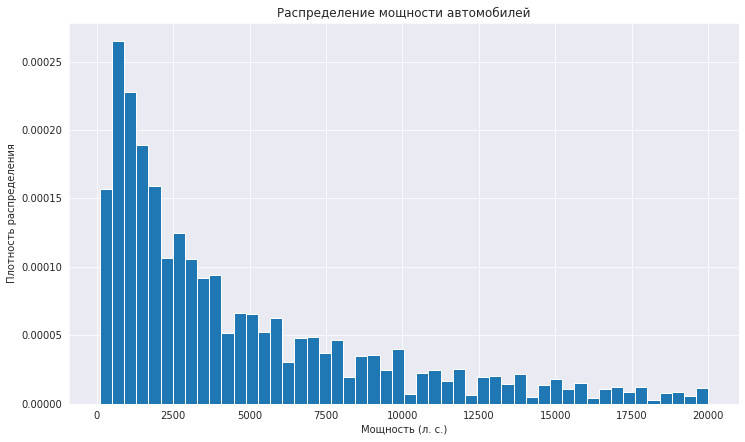

In [13]:
sns.set_style('darkgrid')
df['price'].hist(bins=50, figsize=(12, 7), density=True)
plt.title('Распределение мощности автомобилей')
plt.xlabel('Мощность (л. c.)')
plt.ylabel('Плотность распределения')
plt.show()

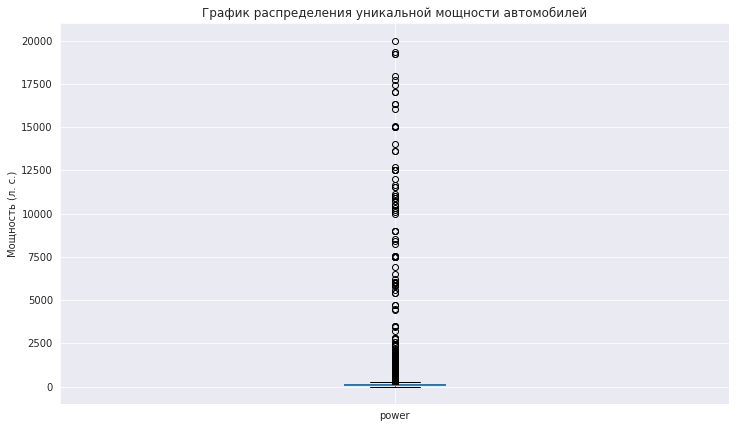

In [14]:
df.boxplot(['power'], figsize=(12, 7))
plt.title('График распределения уникальной мощности автомобилей')
plt.ylabel('Мощность (л. c.)')
plt.show()

Исходя из графиков, мы можем сказать, что машины с мощностью меньше **10 л.c** и болше **2500 л.c** являются аномалия и их следует удалить.

In [15]:
df = df[(df['power'] >= 10) & (df['power'] < 2500)]

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍</b> 
    
Фильтрация по мощности также корректна.

Все видимые аномалии были удалены.

### Поиск и заполнение пропущенных значений

In [16]:
df.isnull().sum()

date_crawled              0
price                     0
vehicle_type          10715
registration_year         0
gearbox                5225
power                     0
model                 10888
kilometer                 0
registration_month        0
fuel_type             15215
brand                     0
repaired              42320
date_created              0
number_of_pictures        0
postal_code               0
last_seen                 0
dtype: int64

Столбец `vehicle_type` содержит в себе категориальный признак, который обозначает тип кузова. Заполнить пропуски медианой или средним не представляется средним. Заполним все пропуски фразой `n/a`, для обозначения отсутствующей характеристики.

In [17]:
df['vehicle_type'] = df['vehicle_type'].fillna('n/a')
df['vehicle_type'].isnull().sum()

0

Столбец `gearbox` содержит информацию о типе коробки передач и является важным параметром для предсказания цены. Пропуски будут вносить шумы в финальную модель. Пропуски не представляется возможным заполнить средним или медианой. Заполним пропуски фразой `other`.

In [18]:
df['gearbox'] = df['gearbox'].fillna('other')
df['gearbox'].isnull().sum()

0

Столбец `model` содержит в себе информацию о модели транспортного средства, так же, как и `gearbox`. Средним или медианой заполнить не получится. Заполним пропуски фразой `other`.

In [19]:
df['model'] = df['model'].fillna('other')
df['model'].isnull().sum()

0

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

    
<b>На доработку❌:</b>
Когда клиент не указывает какой-то параметр объявления - это классический сценарий, мы должны уметь работать и с такими клиентами. При работе с категориальными признаками стоит использовать заглушки в виде новых значений категорий для заполнения пропусков: это позволит как сохранить наблюдения вместо их удаления, так и избавит нас от возможных ошибок при эмпирическом импутировании.

<div class="alert alert-info">
<h2> Комментарий студента <a class="tocSkip"> </h2>

Вместо удаления пропусков я теперь заполняю их фразой `other`
</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера v.2 <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Учтено.

Столбец `fuel_type` содержит в себе информацию о типе топлива. Так как видов топлива не так много, как, например моделей машины, поэтому все пропуски можно заменить словом `other`.

In [20]:
df['fuel_type'] = df['fuel_type'].fillna('other')
df['fuel_type'].isnull().sum()

0

Столбец `repaired` содержит в себе информацию о том, чинился ли автомобиль или нет. Можно считать, что если в столбце есть пропуск, то автомобиль не подвергался починке.

In [21]:
df['repaired'] = df['repaired'].fillna('no')
df['repaired'].isnull().sum()

0

In [22]:
df.isnull().sum()

date_crawled          0
price                 0
vehicle_type          0
registration_year     0
gearbox               0
power                 0
model                 0
kilometer             0
registration_month    0
fuel_type             0
brand                 0
repaired              0
date_created          0
number_of_pictures    0
postal_code           0
last_seen             0
dtype: int64

Теперь пропуски в датасете отсутсвуют.

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍</b> 
    
Пропуски обработаны.

### Оценка зависимости целевого признака от колонок

In [23]:
columns = ['price', 'vehicle_type', 'gearbox', 'power', 'model', 'kilometer', 'fuel_type', 'brand', 'repaired', 'registration_year']

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍</b> 
    
Отброшены неинформативные признаки.

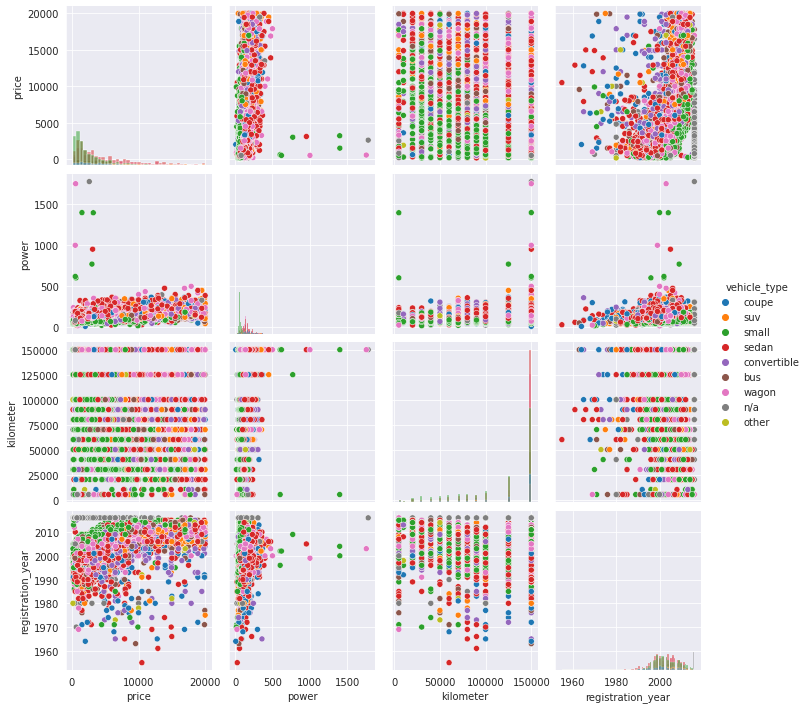

In [24]:
sns.pairplot(df[columns][:10000], hue='vehicle_type', diag_kind='hist')
plt.show()

Из графика видно, что стоимость автомобилей растёт с каждым годом. Зависимость цены от мощности автомобиля, а также года его регистрации, почти что прямое, остальные признаки влияют на целевой в меньшей степени. 

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍</b> 
    
Проанализировали зависимости в данных - отлично!

### Закодируем категориальные значения в категориальные цифровые значения с помощью **OrdinalEncoder**

In [25]:
df_encoded = df[columns].copy()
df_encoded = df_encoded.reset_index(drop=True)

In [26]:
features = df_encoded.drop(['price'], axis=1)
target = df_encoded['price']

In [27]:
categorial_features = ['vehicle_type', 'gearbox', 'model', 'fuel_type', 'brand', 'repaired', 'kilometer']

In [28]:
numeric_features = ['registration_year', 'power']

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

    
<b>На доработку❌:</b>
`kilometer` имеет распределение категориального признака, так как задано всего несколько уникальных значений - с ним также стоит работать как с категорией.

<div class="alert alert-info">
<h2> Комментарий студента <a class="tocSkip"> </h2>

Работаю теперь с ним, как с категориальным признаком.
</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера v.2 <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Учтено.

In [29]:
encoder_oe = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
encoder_ohe = OneHotEncoder(drop='first', sparse=False)

<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации⚠️:</b> `OrdinalEncoder` полезно настраивать на бесперебойную работу при появлении в новых данных ранее неизвестных значений признаков: по умолчанию в таких случаях `OrdinalEncoder` будет выбрасывать ошибку, однако для непрерывности процесса моделирования можно настроить параметры `handle_unknown='use_encoded_value'`, чтобы новые, ранее неизвестные значения кодировались константным значением, а в параметр `unknown_value` нужно передать само значение-константу. 

<div class="alert alert-success">
<h2> Комментарий ревьюера v.2 <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Учтено.

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера v.3 <a class="tocSkip"></h2>

    
<b>На доработку❌:</b>
У `OneHotEncoder` обязательно нужно настраивать параметр `drop='first'` (или другой, в зависимости от задачи) при использовании линейных моделей, чтобы в трансформированной матрице не было мультиколлинеарности и чтобы не попасть в дамми-ловушку: https://www.codecamp.ru/blog/dummy-variable-trap/.
    
Может понадобиться обновление библиотеки `sklearn`, так как в ранних версиях параметры `handle_unknown` и `drop` конфликтовали друг с другом, но в актуальной версии библиотеки такой проблемы нет.

<div class="alert alert-info">
<h2> Комментарий студента v.3<a class="tocSkip"> </h2>

Указал необходимые параметры
</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера v.4 <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Учтено.

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

    
<b>На доработку❌:</b>

Для линейной модели технику `OrdinalEncoder()` использовать нельзя: таким образом вес признака с большим количеством уникальных значений будет выше веса призака с меньшим количество уникальны значений, и модель ошибочно будет интерпретировать этот признак как более важный, что не всегда будет правдой.
    
Для линейной модели категориальные признаки нужно кодировать техникой `OneHotEncoder()`.

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера v.2 <a class="tocSkip"></h2>

    
<b>На доработку❌:</b>

Не учтено - ниже оценивается линейная модель на выборке с `OrdinalEncoder`.

<div class="alert alert-info">
<h2> Комментарий студента v.2<a class="tocSkip"> </h2>

Исправил этот момент, теперь модель по этим параметрам не оценивается.
</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера v.3 <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Учтено.

<div class="alert alert-info">
<h2> Комментарий студента <a class="tocSkip"> </h2>

Я создал две раззные выборки с двумя подходами к кодированию для поиска наилучшей
</div>

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

    
<b>На доработку❌:</b> Кодирование данных нужно осуществлять только после сплитования - так мы не допускаем утечку данных из тестовой части, а также можем контролировать появление в `test` новых значений категориальных признаков.

<div class="alert alert-info">
<h2> Комментарий студента <a class="tocSkip"> </h2>

Изменил подход к кодированию, теперь оно происходит только после сплитования.
</div>

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера v.2 <a class="tocSkip"></h2>

    
<b>На доработку❌:</b> `get_dummies` применяется до разделения на выборки.

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера v.3 <a class="tocSkip"></h2>

    
<b>На доработку❌:</b> Ниже ты создаёшь `ohe_features` как закодированную `features` выборку, это происходит до сплитования.

<div class="alert alert-info">
<h2> Комментарий студента v.3<a class="tocSkip"> </h2>

Изменил подход
</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера v.4 <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Учтено.

<div class="alert alert-warning">
    <h2> Комментарий ревьюера v.2 <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации⚠️:</b> 

Использование `get_dummies` - не слишком хорошее решение, которое имеет некоторые недостатки:
- `get_dummies` нельзя встроить в пайплайны обработки данных и работы с моделями;
- метод не будет работать со значениями, которые которые будут появляться в новых данных и которых не было в данных при обучении моделей.
        
Эти недостатки решаются использованием `OneHotEncoder` (https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html). 
        
В этом блоконоте есть наглядное сравнение этих инструментов - рекомендую ознакомиться: https://colab.research.google.com/drive/1_gAMXcQKoCShB_l8FNtYEejMnosm9mvt?usp=sharing.

<div class="alert alert-success">
<h2> Комментарий ревьюера v.3 <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Учтено.

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера v.2 <a class="tocSkip"></h2>

    
<b>На доработку❌:</b>
1. См.замечание про порядок действий выше.
2. Если решишь продолжить пользоваться `get_dummies()`, в код нужно будет добавить функционал по проверке выборок: названия признаков в выборках должны быть идентичны и идти друг за другом в том же порядке. Метод `info()` или проверка глазами считаться не будут - нужно явное поэлементное сравнение.

<div class="alert alert-info">
<h2> Комментарий студента v.2<a class="tocSkip"> </h2>

Использовал `OneHotEncoder` вместо `get_dummies`
</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера v.3 <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Учтено.

In [30]:
train_features, test_features, train_target, test_target = \
train_test_split(features, target, test_size=0.25, random_state=12345)

In [31]:
encoder_ohe.fit(train_features[categorial_features])
train_features_ohe = encoder_ohe.transform(train_features[categorial_features])
test_features_ohe = encoder_ohe.transform(test_features[categorial_features])

In [32]:
train_sample = train_features_ohe.shape[0] / features.shape[0]
test_sample = test_features_ohe.shape[0] / target.shape[0]

print('Размер тренировочной выборки- {:.0%}'.format(train_sample))
print('Размер тестовой выборки - {:.0%}'.format(test_sample))

Размер тренировочной выборки- 75%
Размер тестовой выборки - 25%


In [33]:
encoded_categorical_df_train = pd.DataFrame(train_features_ohe, columns=encoder_ohe.get_feature_names(categorial_features)).reset_index(drop=True)
encoded_categorical_df_test = pd.DataFrame(test_features_ohe, columns=encoder_ohe.get_feature_names(categorial_features))

print(encoded_categorical_df_train.shape)
print(encoded_categorical_df_test.shape)

numeric_features_train = train_features.drop(categorial_features, axis=1).reset_index(drop=True)
numeric_features_test = test_features.drop(categorial_features, axis=1).reset_index(drop=True)

final_train_features = pd.concat([encoded_categorical_df_train, numeric_features_train], axis=1)
print(final_train_features.shape)
final_test_features = pd.concat([encoded_categorical_df_test, numeric_features_test], axis=1)
print(final_test_features.shape)

(221079, 316)
(73693, 316)
(221079, 318)
(73693, 318)


In [34]:
final_train_features

,vehicle_type_convertible,vehicle_type_coupe,vehicle_type_n/a,vehicle_type_other,vehicle_type_sedan,vehicle_type_small,vehicle_type_suv,vehicle_type_wagon,gearbox_manual,gearbox_other,...,kilometer_50000,kilometer_60000,kilometer_70000,kilometer_80000,kilometer_90000,kilometer_100000,kilometer_125000,kilometer_150000,power,registration_year
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,60,2012
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,104,1983
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,101,2007
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,140,2004
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,197,2001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221074,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,116,1996
221075,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,60,1995
221076,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,88,1999
221077,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,54,1998


In [35]:
final_test_features

,vehicle_type_convertible,vehicle_type_coupe,vehicle_type_n/a,vehicle_type_other,vehicle_type_sedan,vehicle_type_small,vehicle_type_suv,vehicle_type_wagon,gearbox_manual,gearbox_other,...,kilometer_50000,kilometer_60000,kilometer_70000,kilometer_80000,kilometer_90000,kilometer_100000,kilometer_125000,kilometer_150000,power,registration_year
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,60,2005
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,109,2005
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,125,2015
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,64,2002
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,95,1995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73688,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,120,2003
73689,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,140,2006
73690,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,60,1996
73691,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,150,2006


<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера v.4 <a class="tocSkip"></h2>

    
<b>На доработку❌:</b> В выбрке нет численных признаков - только закодированные категории.

<div class="alert alert-info">
<h2> Комментарий студента v.4<a class="tocSkip"> </h2>

Добавил численные признаки
</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера v.5 <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Учтено.

In [36]:
train_features, test_features, train_target, test_target = \
train_test_split(features, target, test_size=0.25, random_state=12345)

features_train_oe = train_features.copy()
features_train_oe[categorial_features] = pd.DataFrame(encoder_oe.fit_transform(train_features[categorial_features]), \
             columns=train_features[categorial_features].columns, index=train_features[categorial_features].index)

features_test_oe = test_features.copy()
features_test_oe[categorial_features] = \
pd.DataFrame(encoder_oe.transform(test_features[categorial_features]), \
             columns=test_features[categorial_features].columns, index=test_features[categorial_features].index)

In [37]:
train_sample = features_train_oe.shape[0] / features.shape[0]
test_sample = features_test_oe.shape[0] / target.shape[0]

print('Размер тренировочной выборки- {:.0%}'.format(train_sample))
print('Размер тестовой выборки - {:.0%}'.format(test_sample))

Размер тренировочной выборки- 75%
Размер тестовой выборки - 25%


<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍</b> 
    
Выполнили сплитование.

### Применим масштабирование для наших признаков для кодирования OrdinalEncoder

In [38]:
numeric_features = ['registration_year', 'power']

In [39]:
scaler = StandardScaler()
features_train_oe[numeric_features] = scaler.fit_transform(features_train_oe[numeric_features])
features_test_oe[numeric_features] = scaler.transform(features_test_oe[numeric_features])

print(features_train_oe.shape)
print(features_test_oe.shape)

(221079, 9)
(73693, 9)


Категориальные признаки были закодированы, все данные разбиты в соотношении 75/25, масштабированы и готовы к обучению!

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Выполнили масштабирование непрерывных признаков - отлично!
</div>

## Обучение моделей

Для начала создадим общий список результатов, чтобы можно было их нагляднее сравнить. По ключу будем хранить название модели, в значении будет список с данными.

In [40]:
results = []

Также напишем небольшой класс-обёртку, чтобы не собирать каждый раз результаты тестирования вручную.

In [41]:
def rmse(target, predictions):
    return (mean_squared_error(target, predictions) ** 0.5).round(2)

In [42]:
class ModelWrapper:
    
    def __init__(self, name, model):
        self.name = name
        self.model = model
        
    def fit(self, features, target):
        start = time.time()
        self.model.fit(features, target)
        end = time.time()
        self.fit_time = (end - start) / 60
        
    def predict(self, features, target):
        start = time.time()
        predicted = self.model.predict(features)
        end = time.time()
        self.predicted_time = (end - start) / 60
        self.rmse = rmse(target, predicted)
    
    def get_model_results(self):
        return {self.name: [self.fit_time, self.predicted_time, self.rmse]}

### Линейная регрессия

#### На выборках с OneHotEncoder

In [43]:
model_lr = LinearRegression()
lr_wrapper = ModelWrapper('LinearRegression_ohe', model_lr)
lr_wrapper.fit(final_train_features, train_target)
lr_wrapper.predict(final_train_features, train_target)
results.append(lr_wrapper.get_model_results())

del lr_wrapper

#### Кросс-валидация

In [44]:
model_lr = LinearRegression()

cross_val_score_lr = \
(cross_val_score(model_lr, final_train_features, train_target, cv=3, scoring='neg_mean_squared_error').mean() * -1) ** 0.5
cross_val_score_lr

2656.7262131352377

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера v.2 <a class="tocSkip"></h2>

    
<b>На доработку❌:</b>
Перевод `MSE` в `RMSE` выполнен неверно - проверь последовательность математических операций, которые ты применяешь к метрике.

<div class="alert alert-info">
<h2> Комментарий студента v.2<a class="tocSkip"> </h2>

Заметил и исправил ошибку, спасибо. Модели ниже также поправил.
</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера v.3 <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Учтено.

### Случайное дерево

Для начала найдем лучшие параметры для случайного дерева.

#### На выборках с OneHotEncoder

In [45]:
params = {
    'n_estimators': range(5, 11, 5),
    'max_depth': range(1, 8, 3),
}

model = RandomForestRegressor(random_state=12345)
grid = GridSearchCV(model, params, cv=3, scoring='neg_mean_squared_error')
grid.fit(final_train_features, train_target)

best_max_depth_rf = grid.best_params_['max_depth']
best_n_estimators_rf = grid.best_params_['n_estimators']

In [46]:
cross_val_score_rf_ohe = (grid.best_score_.mean() * -1) ** 0.5
cross_val_score_rf_ohe

2127.0291755805865

In [47]:
model_rf = grid.best_estimator_
rf_wrapper = ModelWrapper('RandomForestRegressor_ohe', model_rf)
rf_wrapper.fit(final_train_features, train_target)
rf_wrapper.predict(final_train_features, train_target)
results.append(rf_wrapper.get_model_results())

del rf_wrapper

#### На выборках с OrdinalEncoder

In [48]:
params = {
    'n_estimators': range(5, 11, 5),
    'max_depth': range(1, 8, 1),
}

model = RandomForestRegressor(random_state=12345)
grid = GridSearchCV(model, params, cv=3, scoring='neg_mean_squared_error')
grid.fit(features_train_oe, train_target)

best_max_depth_rf = grid.best_params_['max_depth']
best_n_estimators_rf = grid.best_params_['n_estimators']

In [49]:
model_rf = grid.best_estimator_
rf_wrapper = ModelWrapper('RandomForestRegressor_oe', model_rf)
rf_wrapper.fit(features_train_oe, train_target)
rf_wrapper.predict(features_train_oe, train_target)
results.append(rf_wrapper.get_model_results())

del rf_wrapper

#### Кросс-валидация

In [50]:
cross_val_score_rf_oe = (grid.best_score_.mean() * -1) ** 0.5
cross_val_score_rf_oe

2121.567597727027

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера v.4 <a class="tocSkip"></h2>

    
<b>На доработку❌:</b>
Метрика на кросс-валидации должна быть получена из `GridSearchCV`, отдельно проводить кросс-валидацию лучшей модели, которую мы нашил в `GridSearchCV`, не нужно.
    
Тут и далее.

<div class="alert alert-info">
<h2> Комментарий студента v.4<a class="tocSkip"> </h2>

Теперь эту метрику вытаскиваю из `GridSearchCV`
</div>

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера v.5 <a class="tocSkip"></h2>

    
<b>На доработку❌:</b> Если ты берёшь среднее по `mean_test_score`, ты получаешь усредённую оценку всех моделей, которые были исследованы в пределах заданной сетки гиперпараметров. Чтобы получить метрику с кросс-валидации для лучшей модели, нужно использовать `best_score_` - в первом комментарии в конце модельного блока был пример.

<div class="alert alert-info">
<h2> Комментарий студента v.5<a class="tocSkip"> </h2>

Действительно, проглядел. Поменял везде на `best_score_` В интернете и официальной документации `pandas` были другие примеры, я ориентировался на них. Спасибо за подсказку!
</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера v.6 <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Всегда пожалуйста:)

### Дерево поиска

Также сначала найдём лучшие параметры

#### На выборках на OneHotEncoder

In [51]:
params = {
    'max_depth': range(1, 8, 1),
}

model = DecisionTreeRegressor(random_state=12345)
grid = GridSearchCV(model, params, cv=3, scoring='neg_mean_squared_error')
grid.fit(final_train_features, train_target)

best_max_depth_dt = grid.best_params_['max_depth']

In [52]:
cross_val_score_dt_ohe = (grid.best_score_.mean() * -1) ** 0.5
cross_val_score_dt_ohe

2180.7822737076867

In [53]:
model_dt = grid.best_estimator_
dt_wrapper = ModelWrapper('DecisionTreeRegressor_ohe', model_dt)
dt_wrapper.fit(final_train_features, train_target)
dt_wrapper.predict(final_train_features, train_target)
results.append(dt_wrapper.get_model_results())

del dt_wrapper

#### На выборках с OrdinalEncoder

In [54]:
params = {
    'max_depth': range(1, 8, 1),
}

model = DecisionTreeRegressor()
grid = GridSearchCV(model, params, cv=3, scoring='neg_mean_squared_error')
grid.fit(features_train_oe, train_target)

best_max_depth_dt = grid.best_params_['max_depth']

In [55]:
model_dt = grid.best_estimator_
dt_wrapper = ModelWrapper('DecisionTreeRegressor_oe', model_dt)
dt_wrapper.fit(features_train_oe, train_target)
dt_wrapper.predict(features_train_oe, train_target)
results.append(dt_wrapper.get_model_results())

del dt_wrapper

#### Кросс-валидация

In [56]:
cross_val_score_dt_oe = (grid.best_score_.mean() * -1) ** 0.5
cross_val_score_dt_oe

2179.229861857186

### LightGBM

#### На выборках с OneHotEncoder

In [57]:
params = {
    'n_estimators': range(5, 11, 5),
    'learning_rate': np.arange(0.1, 1.0, 0.4)
}

model = lgb.sklearn.LGBMRegressor(random_state=12345, objective='rmse')
grid = GridSearchCV(model, params, cv=3, scoring='neg_mean_squared_error')
grid.fit(final_train_features, train_target)

best_n_estmators_lgb = grid.best_params_['n_estimators']
best_learning_rate_lgb = grid.best_params_['learning_rate']

In [58]:
cross_val_score_lgbm_ohe = (grid.best_score_.mean() * -1) ** 0.5
cross_val_score_lgbm_ohe

1812.3213032812464

In [59]:
model_lgb = grid.best_estimator_
lgb_wrapper = ModelWrapper('LGBMRegressor_ohe', model_lgb)
lgb_wrapper.fit(final_train_features, train_target)
lgb_wrapper.predict(final_train_features, train_target)
results.append(lgb_wrapper.get_model_results())

del lgb_wrapper

#### На выборках с OrdinalEncoder

In [60]:
params = {
    'n_estimators': range(5, 11, 5),
    'learning_rate': np.arange(0.1, 1.0, 0.4)
}

model = lgb.sklearn.LGBMRegressor(random_state=12345, objective='rmse')
grid = GridSearchCV(model, params, cv=3, scoring='neg_mean_squared_error')
grid.fit(features_train_oe, train_target)

best_n_estmators_lgb = grid.best_params_['n_estimators']
best_learning_rate_lgb = grid.best_params_['learning_rate']

In [61]:
model_lgb = grid.best_estimator_
lgb_wrapper = ModelWrapper('LGBMRegressor_oe', model_lgb)
lgb_wrapper.fit(features_train_oe, train_target)
lgb_wrapper.predict(features_train_oe, train_target)
results.append(lgb_wrapper.get_model_results())

del lgb_wrapper

#### Кросс-валидация

In [62]:
cross_val_score_lgbm_oe = (grid.best_score_.mean() * -1) ** 0.5
cross_val_score_lgbm_oe

1826.4851008878184

## Анализ моделей

Построим таблицу для сравнения полученных значений.

In [63]:
results_dict = {k: v for d in results for k, v in d.items()}
results_dict

{'LinearRegression_ohe': [0.40776113271713255, 0.010152057806650797, 2649.39],
 'RandomForestRegressor_ohe': [0.39141761461893715,
  0.010225876172383627,
  2121.65],
 'RandomForestRegressor_oe': [0.03693456252415975,
  0.0023036599159240723,
  2115.29],
 'DecisionTreeRegressor_ohe': [0.061416212717692056,
  0.008298945426940919,
  2166.58],
 'DecisionTreeRegressor_oe': [0.006124019622802734,
  0.0002797842025756836,
  2167.61],
 'LGBMRegressor_ohe': [0.35491650501887, 0.023914059003194172, 1798.08],
 'LGBMRegressor_oe': [0.2399378021558126, 0.003458233674367269, 1805.33]}

In [64]:
results_dict['LGBMRegressor_ohe'].append(cross_val_score_lgbm_ohe)
results_dict['LGBMRegressor_oe'].append(cross_val_score_lgbm_oe)
results_dict['RandomForestRegressor_oe'].append(cross_val_score_rf_oe)
results_dict['RandomForestRegressor_ohe'].append(cross_val_score_rf_ohe)
results_dict['DecisionTreeRegressor_ohe'].append(cross_val_score_dt_ohe)
results_dict['DecisionTreeRegressor_oe'].append(cross_val_score_dt_oe)
results_dict['LinearRegression_ohe'].append(cross_val_score_lr)

In [65]:
results_df = pd.DataFrame(data=results_dict, index=['fit_time', 'predicted_time', 'rmse_train', 'rmse_cross_val'])
results_df.T.sort_values(by='rmse_cross_val', ascending=True)

,fit_time,predicted_time,rmse_train,rmse_cross_val
LGBMRegressor_ohe,0.354917,0.023914,1798.08,1812.321303
LGBMRegressor_oe,0.239938,0.003458,1805.33,1826.485101
RandomForestRegressor_oe,0.036935,0.002304,2115.29,2121.567598
RandomForestRegressor_ohe,0.391418,0.010226,2121.65,2127.029176
DecisionTreeRegressor_oe,0.006124,0.000280,2167.61,2179.229862
DecisionTreeRegressor_ohe,0.061416,0.008299,2166.58,2180.782274
LinearRegression_ohe,0.407761,0.010152,2649.39,2656.726213


<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера v.4 <a class="tocSkip"></h2>

    
<b>На доработку❌:</b>
`RMSE` должен быть с кросс-валидации, а не с `train`.

<div class="alert alert-info">
<h2> Комментарий студента v.4<a class="tocSkip"> </h2>

Дополнительно посчитал `rmse` с кросс-валидации и выбираю лучшую модель именно по этому признаку.
</div>

<div class="alert alert-warning">
    <h2> Комментарий ревьюера v.5 <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации⚠️:</b> 

В целом учтено, однако оценка на `train` нам не нужна, потому что она непоказательна: эта оценка была получена на данных, на которых модель обучалась, и такая оценка ничего не говорит о предсказательной способности нашей модели.

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера v.4 <a class="tocSkip"></h2>

    
<b>На доработку❌:</b>
Эта часть лишняя.

<div class="alert alert-info">
<h2> Комментарий студента v.4<a class="tocSkip"> </h2>

Убрал
</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера v.5 <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Учтено.

Из таблицы видно, что лучшим временем выполнения обладает линейная регрессия, однако, данная модель имеет самый худший показатель `rmse`. `RandomForestRgressor` и `DecisionTreeRegressor` имеют лучший показатель `rmse`, однако имеют сравниетнльо высокое время обучения и предсказания. `LGMBRegressor` имеет не критичнто большее время обучения и предсказания, чем линейная регрессия, однако, показатель `rmse` у него лучше, чем у всех остальных моделей. Исходя их малого времени выполнения и хорошего показателя `rmse` и `rmse_cross_val`, в качестве основной модели я бы выбрал `LGBMRegressor`.

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера v.2 <a class="tocSkip"></h2>

    
<b>На доработку❌:</b>
Зачем валидационная выборка? В замечании ниже было сказано, что используется или кросс-валидация, или валидационная выборка.

<div class="alert alert-info">
<h2> Комментарий студента v.2<a class="tocSkip"> </h2>

Убрал деление, использую исходную тестовую выборку
</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера v.3 <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Учтено.

In [66]:
%%time

model_lgbm = lgb.sklearn.LGBMRegressor(learning_rate=best_learning_rate_lgb, random_state=12345, n_estimators=best_n_estmators_lgb)
model_lgbm.fit(final_train_features, train_target)

CPU times: user 16.4 s, sys: 934 ms, total: 17.4 s
Wall time: 17.4 s


LGBMRegressor(learning_rate=0.5, n_estimators=10, random_state=12345)

In [67]:
%%time

target_predict_ohe = model_lgbm.predict(final_test_features)

CPU times: user 365 ms, sys: 131 ms, total: 496 ms
Wall time: 489 ms


In [68]:
rmse_model_lgbm = rmse(test_target, target_predict_ohe)
rmse_model_lgbm

1784.26

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера v.4 <a class="tocSkip"></h2>

    
<b>На доработку❌:</b>
Зачем повторная кросс-валидация лучшей модели на `train`? Эта оценка уже была получена.

<div class="alert alert-info">
<h2> Комментарий студента v.4<a class="tocSkip"> </h2>

Исправил, теперь кросс-валидация считается на тестовой выборке.
</div>

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера v.5 <a class="tocSkip"></h2>

    
<b>На доработку❌:</b>
На этом этапе кросс-валидация нам в принципе не нужна - мы уже получили оценки на кросс-валидации, выбрали по ним лучшую модель и оценили её на `test`. Также сама кросс-валидация организована неверно: кросс-валидация предполагает деление выборки на фолды, на которых происходит и обучение, и тестирование - в итоге модель и обучается, и тестируется на тестовой выборке, что нарушает концепцию итогового тестирования.

Этот блок нам тоже не нужен.

<div class="alert alert-info">
<h2> Комментарий студента v.5<a class="tocSkip"> </h2>

Убрал данный блок
</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера v.6 <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Учтено.

Сравним нашу модель с константной

In [69]:
dummy = DummyRegressor(strategy='mean')
dummy.fit(features_train_oe, train_target)
dummy_predicted = dummy.predict(test_features)
rmse_model_dummy = rmse(test_target, dummy_predicted)
rmse_model_dummy

4601.04

Проверка на констатной модели показала, что основная модель является адекватной.

## Итоговый вывод

- Была проведена предобработка данных, в результате которой названия столбцов было приведено к `snake_case`. Также мы избавились от аномальных значений в столбцах и заполнили пропуски
- Для определения лучшей модели для данных, мы сравнивали модель градиентного бустинга `LGBMRegressor` и стандартные модели `LinearRegression`, `RandomForestRegressor`, `DecisionTreeRegressor`.
- В результате исследований оказалось, что лучшим временем выполнения обладает линейная регрессия, однако, данная модель имеет самый худший показатель `rmse`. `RandomForestRgressor` и `DecisionTreeRegressor` имеют лучший показатель `rmse`, однако имеют сравниетнльо высокое время обучения и предсказания. `LGMBRegressor` имеет не критичнто большее время обучения и предсказания, чем линейная регрессия, однако, показатель `rmse` у него лучше, чем у всех остальных моделей. Исходя их малого времени выполнения и хорошего показателя `rmse`, в качестве основной модели я бы выбрал `LGBMRegressor`.
- В результате проверки модели градиентого бустинга `LGBMRegressor`, я пришёл к цифрам `rmse` на кросс-валидации = **1810.64** и общее время работы получилось около **3 секунд**. Данные показатели получились даже лучше, чем при поиске лучшей модели на тренировочных данных. Именно модель `LGBMRegressor` я советую использовать в дальнейшей работе.

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

    
<b>На доработку❌:</b>

По этому блоку будет несколько важных замечаний:
1. Все модели этого блока оцениваются на тестовой выборке - это преждевременное решение, так как оценка на тестовой выборке - это финальное тестирование для лучшей модели, которая была отобрана в ходе промежуточного тестирования. Эта концепция находит своё отражение в условиях эксплуатации модели в реальной среде: в промышленной эксплуатации не работает несколько моделей одновременно - в промышленную эксплуатацию запускают только одну модель, которая была выбрана из нескольких в ходе промежуточной оценки. Так же и здесь - тестовая выборка имитирует поток реальных данных, и с этим потоком должна работать только одна модель. 


2. Лучшая модель должна быть выбрана по двум критериям - метрика `RMSE` и время работы модели. Далее сценарий работы с моделями в этом блоке зависит от выбранной стратегии валидации и оптимизации гиперпараметров:
- для оптимизации гиперпараметров и промежуточной оценки моделей была выделена валидационная выборка;
- для оптимизации гиперпараметров и промежуточной оценки моделей проводится кросс-валидация.
    
    В первом случае метрика промежуточной оценки модели - это метрика `RMSE` на валидационной выборке, полученная от использования на `valid` лучшей модели, а время - это время обучения модели с лучшими гиперпарметрами на `train` и время совершения ею предсказаний на `valid`.
    
    Во втором случае метрика промежуточной оценким модели - это метрика `RMSE` с кросс-валидации: в случае использования `cross_val_score` - это среднее из массива метрик (длина соответствует количеству фолдов для кросс-валидации), который возвращает инструмент, в случае использования `GridSearchCV` или `RandomizedSearchCV` - это метрика из атрибута `best_score_`. Временем работы лучшей модели может быть время обучения на `train` и время предсказания на `train` выборке (только время, метрика `RMSE` на тренировочной выборке не нужна).
    
    Тут часто студенты делают ошибку, принимая в качестве метрики времени время работы лучшей модели, а время оптимизации гиперпараметров в целом (то есть время выполнения всей ячейки кода цикла с `cross_val_score` или ячейки с `GridSearchCV`) - это некорректный подход: на практике модель не будет каждый раз переобучаться и выполнять оптимизацию гиперпараметров перед очередным предсказанием - сначала будет найдена лучшая модель, а она уже будет использоваться для обучения и предсказаний. Поэтому и в этом случае сначала определяется лучшая модель, а уже потом замеряется время её работы: кросс-валидации как альтернатива времени обучения и предсказания (потому что по сути кросс-валидация объединяет в себе обучение и предсказание) или время обучения и предсказания на `train`.
    
    Независимо от выбранной стратегии кросс-валидации алгоритм работы выглядит как:
- оптимизация гиперпараметров и поиск лучшей модели;
- оценка метрики `RMSE`;
- оценка времени работы лучшей модели: на валидационной выборке (если она выделялась) или на кросс-валидации/тренировочной выборке (если проводилась кросс-валидация).
    
Концепт для `valid`:
    
    for ... in ...:
    
        #код для поиска лучшей модели
    
    model = ... #код для инициализации лучшей модели с оптимальными гиперпараметрами
    
    model.fit(X_train, Y_train) #замеряем время обучения
    
    pred = model.predict(X_valid) #замеряем время предсказания
    
    RMSE = (Y_valid, pred) #замеряем RMSE на valid
    
Концепт для кросс-валидации:
    
    model = #инициализируем модель
    gs = GridSearchCV(...) #настраиваем поиск по сетке
    
    gs.fit(...) #находим лучшую модель
    
    gs.best_score_ #замеряем RMSE на  кросс-валидации
    
    model = gs.best_estimator_ #получаем лучшую модель из best_estimator
    model = #YourModel(random_state = 42, **gs.best_params) #альтернативный способ получения лучшей модели
    
    model.fit(X_train, Y_train) #замеряем время обучения
    model.predict(X_train) #замеряем время предсказания
    
    
   По итогу нужно будет провести сравнительную характеристику моделей по критериям метрики `RMSE` и времени работы моделей и выбрать лучшую - именно эта лучшая модель должна будет оцениваться на тестовой выборке.
    
   Обрати также внимание, что при создании таблицы нельзя использовать вручную введённые значения - они потеряют актуальность при любом изменении в данных, их обработке или в моделях. Значения метрик лучше помещать в переменные и использовать их для создания таблиц. Для сохранения в переменные времени работы моделей можно использовать модуль `time`:
    
    from time import time
    
    start = time()
    
    #код модели
    
    end = time()
    
    model_time = (end-start)/60 #перевожу в минуты, так как по умолчанию секунды
    
3. Очень важно также проверить лучшую модель на адекватность, сравнив качество её предсказаний с качеством модели, которая предсказывала бы константу - вдруг окажется, что не было бы большого смысла заниматься созданием новых признаков, тюнингом и кросс-валидацией моделей, если можно было бы просто предсказывать среднее значение тренировочной выборки? 
    
    В качестве константной модели можно использовать `DummyRegressor` (https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyRegressor.html) -  эта модель как раз создана для генерирования константных предсказаний.
    
    Важно, чтобы результат тестирования нашей модели на тествой выборке был лучше, чем результат константной модели - в противном случае наша модель является бесполезной, так как все наши усилия над проектом не принесли результата, а можель, просто предсказывющая среднее на `train`, делает нашу работу лучше.


4. Итоговый вывод нужно поправить.

<div class="alert alert-info">
<h2> Комментарий студента <a class="tocSkip"> </h2>

Я перелопатил весь последний и предпоследний пункт, для поиска наилучшей модели по времени и ошибке. Надеюсь я правильно понял то, что ты написал и сделал всё в лучшем виде :)
</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера v.2 <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Точечные замечания выше.

<div style="border:solid Chocolate 2px; padding: 40px">

# Комментарий ревьюера: общий вывод по проекту.

Данила, проект получился на довольно хорошем уровне - отличная работа над проектом, молодец!

Мне нравится твой аналитический подход к выполнению проекта, ты соблюдаешь структуру работы, выполняешь её последовательно - это очень хорошо! Шаги проекта выполнены по порядку согласно плану проекта, нет смысловых и структурных ям. Важно, что не забываешь про выводы.
    
Отмечу отличную предобработку данных - были найдены и корректно обработаны все аномалии и пропуски, также выполнено кодирование категориальных переменных и масштабирование непрерывных.

Работа с моделями также выполнена неплохо: исследовано несколько алгоритмов, проведён подбор гиперпараметров с помощью `GridSearchCV` - молодец!
    
Над проектом ещё стоит поработать - есть рекомендации по дополнению некоторых твоих шагов проекта. Такие рекомендации я отметил жёлтыми комментариями. Будет здорово, если ты учтёшь их - так проект станет структурно и содержательно более совершенным.
    
Также в работе есть критические замечания. К этим замечаниям я оставил пояснительные комментарии красного цвета, в которых перечислил возможные варианты дальнейших действий. Уверен, ты быстро с этим управишься:)
    
Если о том, что нужно сделать в рамках комментариев, будут возникать вопросы - оставь их, пожалуйста, в комментариях, и я отвечу на них во время следующего ревью.
    
Также буду рад ответить на любые твои вопросы по проекту или на какие-либо другие, если они у тебя имеются - оставь их в комментариях, и я постараюсь ответить:)
    
Жду твой проект на повторном ревью. До встречи:)

<div style="border:solid Chocolate 2px; padding: 40px">

# Комментарий ревьюера: общий вывод по проекту v.2.

Данила, продолжаем работу над проектом - актуальные замечания отмечены комментариями с меткой `v.2`.
    
Жду тебя снова:)

<div style="border:solid Chocolate 2px; padding: 40px">

# Комментарий ревьюера: общий вывод по проекту v.3.

Данила, продолжаем работу над проектом - актуальные замечания отмечены комментариями с меткой `v.3`.
    
Жду тебя снова:)

<div style="border:solid Chocolate 2px; padding: 40px">

# Комментарий ревьюера: общий вывод по проекту v.4.

Данила, продолжаем работу над проектом - актуальные замечания отмечены комментариями с меткой `v.4`.

Отмечу, что у нас осталось только две попытки закончить работу над проектом - в противном случае нужно будет взять академ и продолжить работу над проектом в другой когорте. Надеюсь, мы потратим две оставшиеся итерации эффективно и успеем всё закрыть без перехода.
    
Жду тебя снова:)

<div style="border:solid Chocolate 2px; padding: 40px">

# Комментарий ревьюера: общий вывод по проекту v.5.

Данила, продолжаем работу над проектом - актуальные замечания отмечены комментариями с меткой `v.5`.

Жду тебя снова:)

<div style="border:solid Chocolate 2px; padding: 40px">

# Комментарий ревьюера: общий вывод по проекту v.6.

Данила, все замечания учтены - проект принят!
    
Спасибо за хорошую работу над проектом, желаю успехов в дальнейшем обучении:)